In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 1000)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## 1. Load Data

In [2]:
# Load data
df = pd.read_csv('../data_onboarding/sp500_ratios_price_data.csv')
print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")

Dataset shape: (1048575, 23)

Columns: ['Ticker', 'Date', 'Open', 'Close', 'Volume', 'quarter', 'year', 'Asset Turnover', 'Current Ratio', 'Days Sales In Receivables', 'Debt/Equity Ratio', 'EBIT Margin', 'EBITDA Margin', 'Gross Margin', 'Inventory Turnover Ratio', 'Long-term Debt / Capital', 'Net Profit Margin', 'Operating Margin', 'Pre-Tax Profit Margin', 'ROA - Return On Assets', 'ROE - Return On Equity', 'Receiveable Turnover', 'Return On Tangible Equity']


## 2. Data Overview

In [3]:
# Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 23 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Ticker                     1048575 non-null  object 
 1   Date                       1048575 non-null  object 
 2   Open                       1048575 non-null  float64
 3   Close                      1048575 non-null  float64
 4   Volume                     1048575 non-null  int64  
 5   quarter                    1048575 non-null  int64  
 6   year                       1048575 non-null  int64  
 7   Asset Turnover             1048575 non-null  float64
 8   Current Ratio              1048575 non-null  float64
 9   Days Sales In Receivables  1048575 non-null  float64
 10  Debt/Equity Ratio          1048575 non-null  float64
 11  EBIT Margin                1048575 non-null  float64
 12  EBITDA Margin              1048575 non-null  int64  
 13  Gross Margin

In [4]:
# First few rows
df.head(10)

,Ticker,Date,Open,Close,Volume,quarter,year,Asset Turnover,Current Ratio,Days Sales In Receivables,Debt/Equity Ratio,EBIT Margin,EBITDA Margin,Gross Margin,Inventory Turnover Ratio,Long-term Debt / Capital,Net Profit Margin,Operating Margin,Pre-Tax Profit Margin,ROA - Return On Assets,ROE - Return On Equity,Receiveable Turnover,Return On Tangible Equity
0,A,2005-04-01,13.88,13.67,4717800,2,2005,0.1758,2.7269,67.8873,0.2972,3.2864,0,50.0783,0.666,0.2291,7.4335,3.2864,4.4601,0.7292,1.3699,1.3257,1.5538
1,A,2005-04-04,13.59,13.26,6827100,2,2005,0.1758,2.7269,67.8873,0.2972,3.2864,0,50.0783,0.666,0.2291,7.4335,3.2864,4.4601,0.7292,1.3699,1.3257,1.5538
2,A,2005-04-05,13.29,13.23,5839100,2,2005,0.1758,2.7269,67.8873,0.2972,3.2864,0,50.0783,0.666,0.2291,7.4335,3.2864,4.4601,0.7292,1.3699,1.3257,1.5538
3,A,2005-04-06,13.23,13.42,2994600,2,2005,0.1758,2.7269,67.8873,0.2972,3.2864,0,50.0783,0.666,0.2291,7.4335,3.2864,4.4601,0.7292,1.3699,1.3257,1.5538
4,A,2005-04-07,13.38,13.37,4072300,2,2005,0.1758,2.7269,67.8873,0.2972,3.2864,0,50.0783,0.666,0.2291,7.4335,3.2864,4.4601,0.7292,1.3699,1.3257,1.5538
5,A,2005-04-08,13.35,13.24,2677800,2,2005,0.1758,2.7269,67.8873,0.2972,3.2864,0,50.0783,0.666,0.2291,7.4335,3.2864,4.4601,0.7292,1.3699,1.3257,1.5538
6,A,2005-04-11,13.22,13.10,4180200,2,2005,0.1758,2.7269,67.8873,0.2972,3.2864,0,50.0783,0.666,0.2291,7.4335,3.2864,4.4601,0.7292,1.3699,1.3257,1.5538
7,A,2005-04-12,13.01,13.23,3661300,2,2005,0.1758,2.7269,67.8873,0.2972,3.2864,0,50.0783,0.666,0.2291,7.4335,3.2864,4.4601,0.7292,1.3699,1.3257,1.5538
8,A,2005-04-13,13.16,12.89,3277700,2,2005,0.1758,2.7269,67.8873,0.2972,3.2864,0,50.0783,0.666,0.2291,7.4335,3.2864,4.4601,0.7292,1.3699,1.3257,1.5538
9,A,2005-04-14,12.89,12.80,2925500,2,2005,0.1758,2.7269,67.8873,0.2972,3.2864,0,50.0783,0.666,0.2291,7.4335,3.2864,4.4601,0.7292,1.3699,1.3257,1.5538


In [5]:
# Statistical summary
df.describe()

,Open,Close,Volume,quarter,year,Asset Turnover,Current Ratio,Days Sales In Receivables,Debt/Equity Ratio,EBIT Margin,EBITDA Margin,Gross Margin,Inventory Turnover Ratio,Long-term Debt / Capital,Net Profit Margin,Operating Margin,Pre-Tax Profit Margin,ROA - Return On Assets,ROE - Return On Equity,Receiveable Turnover,Return On Tangible Equity
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1048575.0,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,898221.000000,1.048193e+06,1.048575e+06,1.042435e+06
mean,6.897929e+01,6.899068e+01,6.947570e+06,2.535163e+00,2.012938e+03,1.970606e-01,1.702334e+00,5.193525e+01,7.797906e-01,3.564822e+00,0.0,4.060805e+01,2.403395e+00,4.165346e-01,-5.679585e-01,3.658785e+00,2.565558e+00,1.627511,4.849451e+00,3.271220e+00,1.351751e+00
std,1.236576e+02,1.236645e+02,3.712794e+07,1.105945e+00,4.601983e+00,1.851169e-01,1.598402e+00,9.257088e+01,2.231088e+01,6.925780e+02,0.0,1.145495e+02,1.569755e+01,9.197273e-01,6.736977e+02,6.932909e+02,6.752293e+02,2.824180,1.492376e+02,1.694418e+01,3.061666e+02
min,8.800000e-01,8.500000e-01,0.000000e+00,1.000000e+00,2.005000e+03,-3.036000e-01,0.000000e+00,-1.071780e+03,-1.294600e+03,-7.601330e+04,0.0,-1.377330e+04,-1.565010e+01,-6.315790e+01,-7.279330e+04,-7.601330e+04,-7.279330e+04,-97.276700,-1.222000e+04,-3.083500e+00,-1.633330e+04
25%,2.257000e+01,2.257000e+01,1.065200e+06,2.000000e+00,2.009000e+03,7.960000e-02,8.603000e-01,1.989260e+01,2.744000e-01,7.504600e+00,0.0,2.088040e+01,0.000000e+00,2.094000e-01,4.852800e+00,7.511400e+00,6.950300e+00,0.562700,1.789800e+00,1.139000e+00,-2.716300e+00
50%,3.948000e+01,3.949000e+01,2.291800e+06,3.000000e+00,2.013000e+03,1.522000e-01,1.353600e+00,4.435880e+01,6.317000e-01,1.472000e+01,0.0,3.995530e+01,8.834000e-01,3.728000e-01,9.865700e+00,1.467390e+01,1.340920e+01,1.454900,3.680600e+00,1.644900e+00,3.423200e+00
75%,7.285000e+01,7.286000e+01,5.157500e+06,4.000000e+00,2.017000e+03,2.521000e-01,2.107200e+00,6.171650e+01,1.223300e+00,2.285980e+01,0.0,6.314260e+01,1.812800e+00,5.443000e-01,1.719580e+01,2.283020e+01,2.228640e+01,2.647900,6.101700e+00,2.401000e+00,8.545400e+00
max,3.547000e+03,3.531450e+03,2.147484e+09,4.000000e+00,2.020000e+03,1.686600e+00,2.347670e+01,3.233950e+03,8.347330e+02,2.870365e+04,0.0,5.326530e+02,1.505060e+03,6.053620e+01,2.787976e+04,2.895665e+04,2.819549e+04,42.077800,3.694120e+03,7.726060e+02,1.918670e+04


## 3. Columns Required for US Basel III Value at Risk (VaR)

### Basel III VaR Requirements:

For **US Basel III Market Risk VaR** calculation, you typically need:

#### **Primary Columns (Available in your dataset):**
1. **`Ticker`** - Security identifier
2. **`Date`** - Time series for historical analysis
3. **`Close`** - Daily closing prices (essential for calculating returns)
4. **`Volume`** - Trading volume (for liquidity risk assessment)

#### **Key Calculations Needed:**
- **Daily Returns**: Calculate log returns from Close prices
- **Portfolio Weights**: Based on position sizes
- **Volatility**: Standard deviation of returns
- **Correlation Matrix**: Between different securities

#### **Basel III VaR Standards:**
- **Confidence Level**: 99% (one-tailed)
- **Holding Period**: 10 days
- **Observation Period**: At least 1 year (250 trading days)
- **Update Frequency**: At least quarterly

### Additional Considerations:
- The **financial ratios** in your dataset can be used for:
  - Credit risk assessment
  - Fundamental analysis
  - Risk-adjusted performance metrics
- But they are **not directly required** for market risk VaR calculation

In [6]:
# Identify VaR-relevant columns
var_columns = ['Ticker', 'Date', 'Close', 'Volume']
print("Columns required for Basel III VaR calculation:")
for col in var_columns:
    print(f"  -> {col}")

# Check if all required columns exist
missing_cols = [col for col in var_columns if col not in df.columns]
if missing_cols:
    print(f"\n⚠️ Missing columns: {missing_cols}")
else:
    print("\n✓ All required columns are present!")

Columns required for Basel III VaR calculation:
  -> Ticker
  -> Date
  -> Close
  -> Volume

✓ All required columns are present!


## 4. Data Quality Report

In [8]:
# Missing values analysis
print("=" * 80)
print("MISSING VALUES ANALYSIS")
print("=" * 80)

missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2)
}).sort_values('Missing_Count', ascending=False)

print(missing_data[missing_data['Missing_Count'] > 0])
print(f"\nTotal columns with missing values: {(missing_data['Missing_Count'] > 0).sum()}")

MISSING VALUES ANALYSIS
                                              Column  Missing_Count  \
ROA - Return On Assets        ROA - Return On Assets         150354   
Return On Tangible Equity  Return On Tangible Equity           6140   
ROE - Return On Equity        ROE - Return On Equity            382   

                           Missing_Percentage  
ROA - Return On Assets                  14.34  
Return On Tangible Equity                0.59  
ROE - Return On Equity                   0.04  

Total columns with missing values: 3


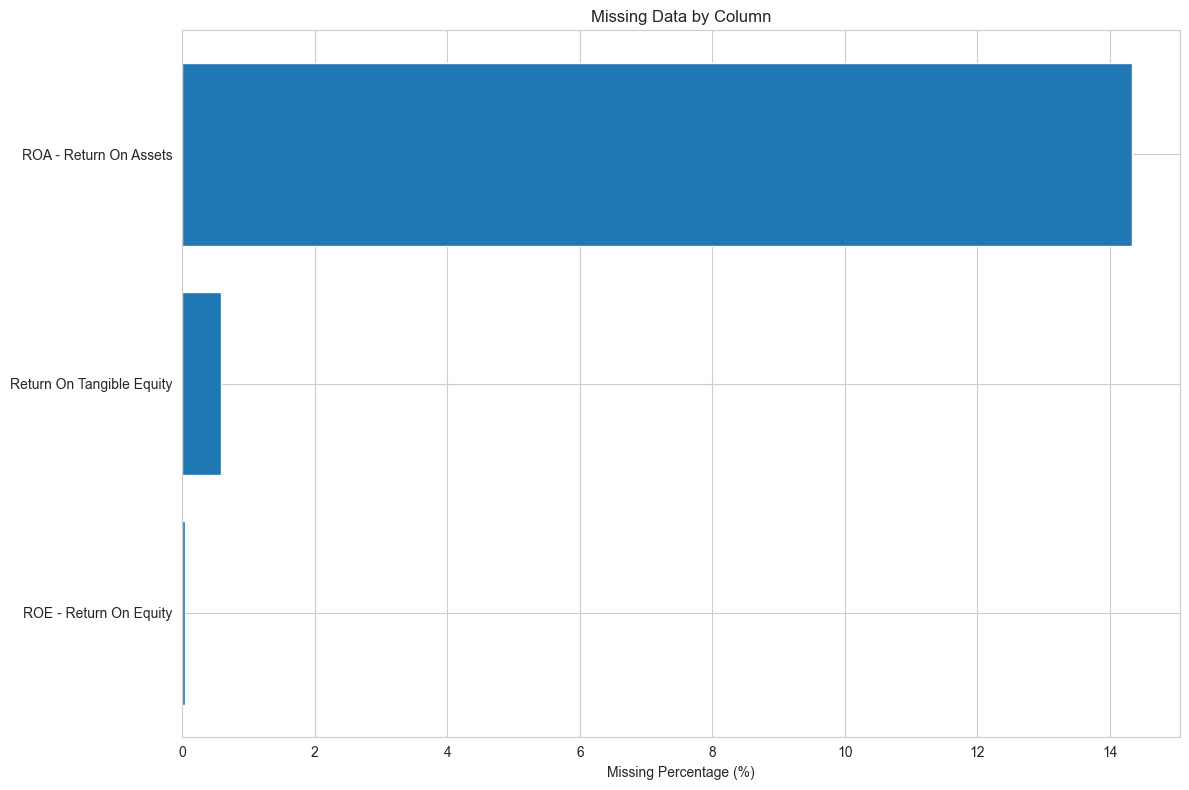

In [9]:
# Visualize missing data
plt.figure(figsize=(12, 8))
missing_cols = missing_data[missing_data['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=True)
if len(missing_cols) > 0:
    plt.barh(missing_cols['Column'], missing_cols['Missing_Percentage'])
    plt.xlabel('Missing Percentage (%)')
    plt.title('Missing Data by Column')
    plt.tight_layout()
    plt.show()
else:
    print("No missing values found in the dataset!")

In [10]:
# Data types and memory usage
print("=" * 80)
print("DATA TYPES AND MEMORY USAGE")
print("=" * 80)
print(df.dtypes)
print(f"\nMemory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

DATA TYPES AND MEMORY USAGE
Ticker                        object
Date                          object
Open                         float64
Close                        float64
Volume                         int64
quarter                        int64
year                           int64
Asset Turnover               float64
Current Ratio                float64
Days Sales In Receivables    float64
Debt/Equity Ratio            float64
EBIT Margin                  float64
EBITDA Margin                  int64
Gross Margin                 float64
Inventory Turnover Ratio     float64
Long-term Debt / Capital     float64
Net Profit Margin            float64
Operating Margin             float64
Pre-Tax Profit Margin        float64
ROA - Return On Assets       float64
ROE - Return On Equity       float64
Receiveable Turnover         float64
Return On Tangible Equity    float64
dtype: object

Memory usage: 295.12 MB


In [11]:
# Date range and temporal coverage
print("=" * 80)
print("TEMPORAL COVERAGE")
print("=" * 80)

df['Date'] = pd.to_datetime(df['Date'])
print(f"Date range: {df['Date'].min()} to {df['Date'].max()}")
print(f"Total days: {(df['Date'].max() - df['Date'].min()).days}")
print(f"Unique dates: {df['Date'].nunique()}")
print(f"\nYear range: {df['year'].min()} to {df['year'].max()}")
print(f"Unique tickers: {df['Ticker'].nunique()}")

TEMPORAL COVERAGE
Date range: 2005-04-01 00:00:00 to 2020-09-30 00:00:00
Total days: 5661
Unique dates: 3903

Year range: 2005 to 2020
Unique tickers: 321


In [12]:
# Check for duplicates
print("=" * 80)
print("DUPLICATE RECORDS")
print("=" * 80)

duplicates = df.duplicated(subset=['Ticker', 'Date']).sum()
print(f"Duplicate (Ticker, Date) combinations: {duplicates}")
print(f"Percentage: {(duplicates / len(df) * 100):.2f}%")

if duplicates > 0:
    print("\nSample duplicates:")
    print(df[df.duplicated(subset=['Ticker', 'Date'], keep=False)].head(10))

DUPLICATE RECORDS
Duplicate (Ticker, Date) combinations: 0
Percentage: 0.00%


In [13]:
# Price data quality checks for VaR columns
print("=" * 80)
print("VAR-RELEVANT COLUMNS QUALITY CHECK")
print("=" * 80)

# Check for negative or zero prices
print("\n1. CLOSE PRICES:")
print(f"   - Negative values: {(df['Close'] < 0).sum()}")
print(f"   - Zero values: {(df['Close'] == 0).sum()}")
print(f"   - Missing values: {df['Close'].isnull().sum()}")
print(f"   - Min: {df['Close'].min()}, Max: {df['Close'].max()}")

print("\n2. VOLUME:")
print(f"   - Negative values: {(df['Volume'] < 0).sum()}")
print(f"   - Zero values: {(df['Volume'] == 0).sum()}")
print(f"   - Missing values: {df['Volume'].isnull().sum()}")
print(f"   - Min: {df['Volume'].min()}, Max: {df['Volume'].max()}")

print("\n3. OPEN PRICES:")
print(f"   - Negative values: {(df['Open'] < 0).sum()}")
print(f"   - Zero values: {(df['Open'] == 0).sum()}")
print(f"   - Missing values: {df['Open'].isnull().sum()}")

VAR-RELEVANT COLUMNS QUALITY CHECK

1. CLOSE PRICES:
   - Negative values: 0
   - Zero values: 0
   - Missing values: 0
   - Min: 0.85, Max: 3531.45

2. VOLUME:
   - Negative values: 0
   - Zero values: 1277
   - Missing values: 0
   - Min: 0, Max: 2147483647

3. OPEN PRICES:
   - Negative values: 0
   - Zero values: 0
   - Missing values: 0


OBSERVATIONS PER TICKER

Statistics:
count     321.000000
mean     3266.588785
std       547.811600
min        69.000000
25%      3463.000000
50%      3463.000000
75%      3463.000000
max      3591.000000
Name: count, dtype: float64


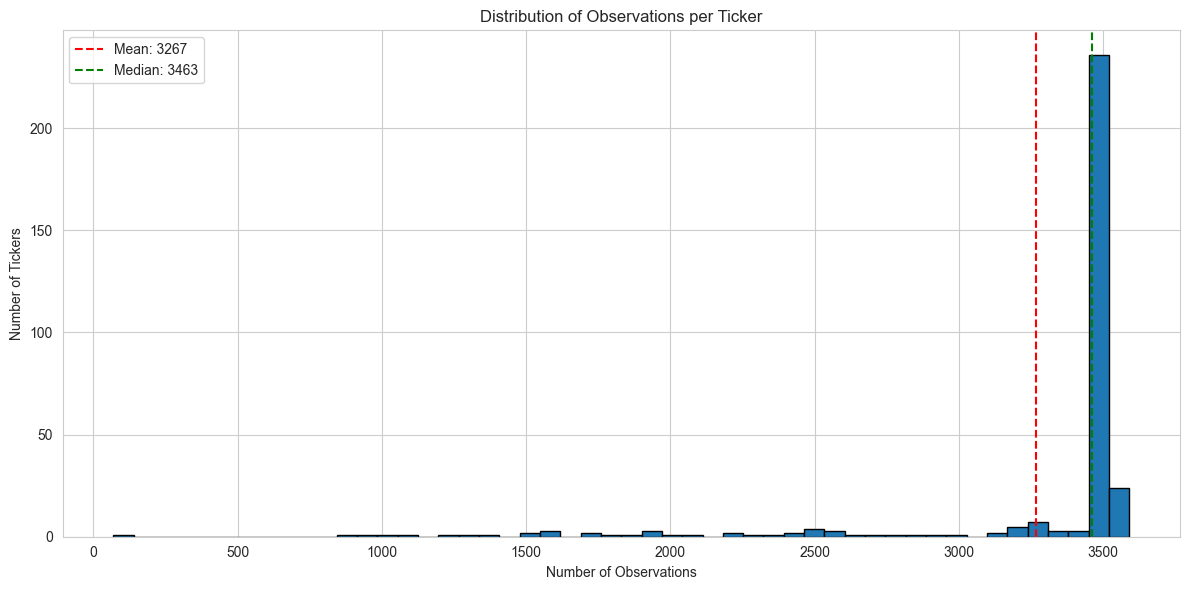

In [14]:
# Distribution of observations per ticker
print("=" * 80)
print("OBSERVATIONS PER TICKER")
print("=" * 80)

ticker_counts = df['Ticker'].value_counts()
print(f"\nStatistics:")
print(ticker_counts.describe())

plt.figure(figsize=(12, 6))
plt.hist(ticker_counts, bins=50, edgecolor='black')
plt.xlabel('Number of Observations')
plt.ylabel('Number of Tickers')
plt.title('Distribution of Observations per Ticker')
plt.axvline(ticker_counts.mean(), color='red', linestyle='--', label=f'Mean: {ticker_counts.mean():.0f}')
plt.axvline(ticker_counts.median(), color='green', linestyle='--', label=f'Median: {ticker_counts.median():.0f}')
plt.legend()
plt.tight_layout()
plt.show()

## 5. Price and Volume Analysis

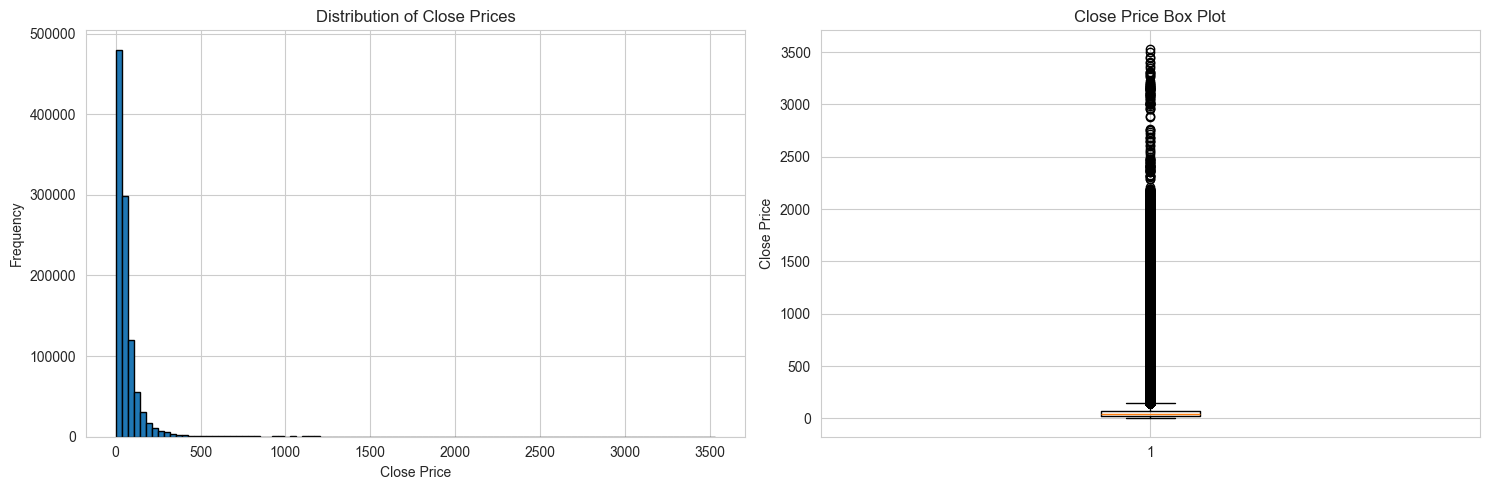

In [15]:
# Close price distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram
axes[0].hist(df['Close'].dropna(), bins=100, edgecolor='black')
axes[0].set_xlabel('Close Price')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Close Prices')

# Box plot
axes[1].boxplot(df['Close'].dropna())
axes[1].set_ylabel('Close Price')
axes[1].set_title('Close Price Box Plot')

plt.tight_layout()
plt.show()

Sample Analysis for Ticker: GS

Return Statistics:
count    3590.000000
mean        0.000576
std         0.029276
min        -0.167521
25%        -0.009399
50%         0.000461
75%         0.010350
max         1.142837
Name: Daily_Return, dtype: float64


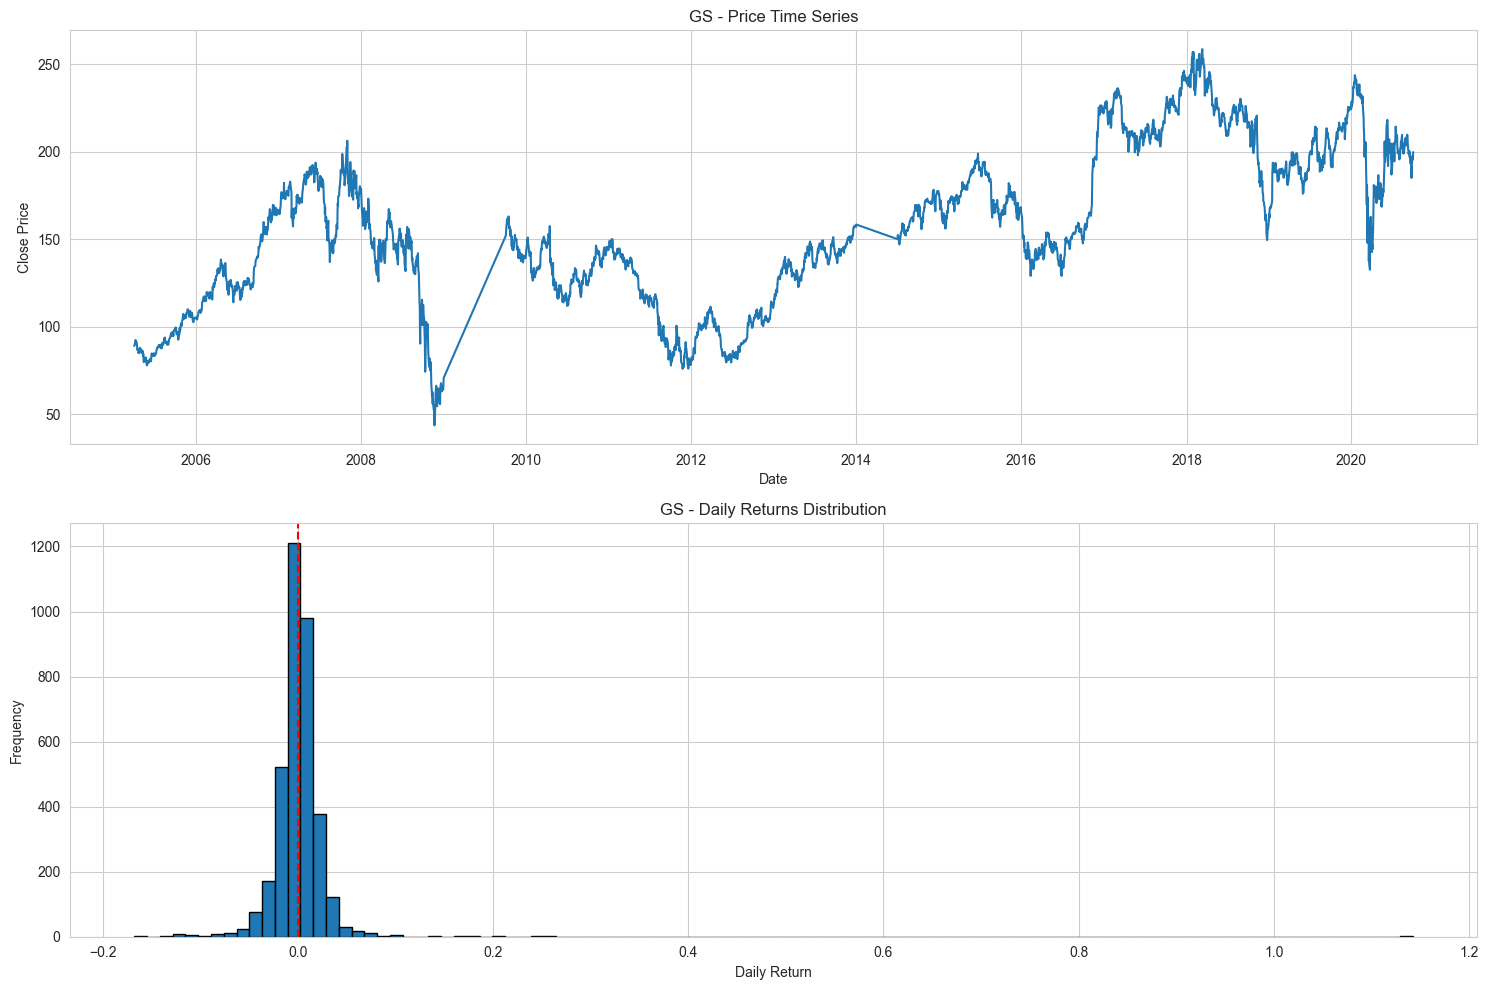

In [16]:
# Calculate daily returns for a sample ticker
sample_ticker = df['Ticker'].value_counts().index[0]
print(f"Sample Analysis for Ticker: {sample_ticker}")

sample_data = df[df['Ticker'] == sample_ticker].sort_values('Date').copy()
sample_data['Daily_Return'] = sample_data['Close'].pct_change()
sample_data['Log_Return'] = np.log(sample_data['Close'] / sample_data['Close'].shift(1))

print(f"\nReturn Statistics:")
print(sample_data['Daily_Return'].describe())

# Plot returns
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Price time series
axes[0].plot(sample_data['Date'], sample_data['Close'])
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Close Price')
axes[0].set_title(f'{sample_ticker} - Price Time Series')
axes[0].grid(True)

# Returns distribution
axes[1].hist(sample_data['Daily_Return'].dropna(), bins=100, edgecolor='black')
axes[1].set_xlabel('Daily Return')
axes[1].set_ylabel('Frequency')
axes[1].set_title(f'{sample_ticker} - Daily Returns Distribution')
axes[1].axvline(0, color='red', linestyle='--')

plt.tight_layout()
plt.show()

## 6. Financial Ratios Analysis

In [17]:
# List of financial ratios
ratio_columns = [col for col in df.columns if col not in ['Ticker', 'Date', 'Open', 'Close', 'Volume', 'quarter', 'year']]

print("Financial Ratios in Dataset:")
for i, col in enumerate(ratio_columns, 1):
    print(f"{i}. {col}")

Financial Ratios in Dataset:
1. Asset Turnover
2. Current Ratio
3. Days Sales In Receivables
4. Debt/Equity Ratio
5. EBIT Margin
6. EBITDA Margin
7. Gross Margin
8. Inventory Turnover Ratio
9. Long-term Debt / Capital
10. Net Profit Margin
11. Operating Margin
12. Pre-Tax Profit Margin
13. ROA - Return On Assets
14. ROE - Return On Equity
15. Receiveable Turnover
16. Return On Tangible Equity


In [18]:
# Summary statistics for key ratios
key_ratios = ['Current Ratio', 'Debt/Equity Ratio', 'ROE - Return On Equity', 
              'ROA - Return On Assets', 'Net Profit Margin', 'Gross Margin']

print("Key Financial Ratios - Summary Statistics:\n")
df[key_ratios].describe()

Key Financial Ratios - Summary Statistics:



,Current Ratio,Debt/Equity Ratio,ROE - Return On Equity,ROA - Return On Assets,Net Profit Margin,Gross Margin
count,1.048575e+06,1.048575e+06,1.048193e+06,898221.000000,1.048575e+06,1.048575e+06
mean,1.702334e+00,7.797906e-01,4.849451e+00,1.627511,-5.679585e-01,4.060805e+01
std,1.598402e+00,2.231088e+01,1.492376e+02,2.824180,6.736977e+02,1.145495e+02
min,0.000000e+00,-1.294600e+03,-1.222000e+04,-97.276700,-7.279330e+04,-1.377330e+04
25%,8.603000e-01,2.744000e-01,1.789800e+00,0.562700,4.852800e+00,2.088040e+01
50%,1.353600e+00,6.317000e-01,3.680600e+00,1.454900,9.865700e+00,3.995530e+01
75%,2.107200e+00,1.223300e+00,6.101700e+00,2.647900,1.719580e+01,6.314260e+01
max,2.347670e+01,8.347330e+02,3.694120e+03,42.077800,2.787976e+04,5.326530e+02


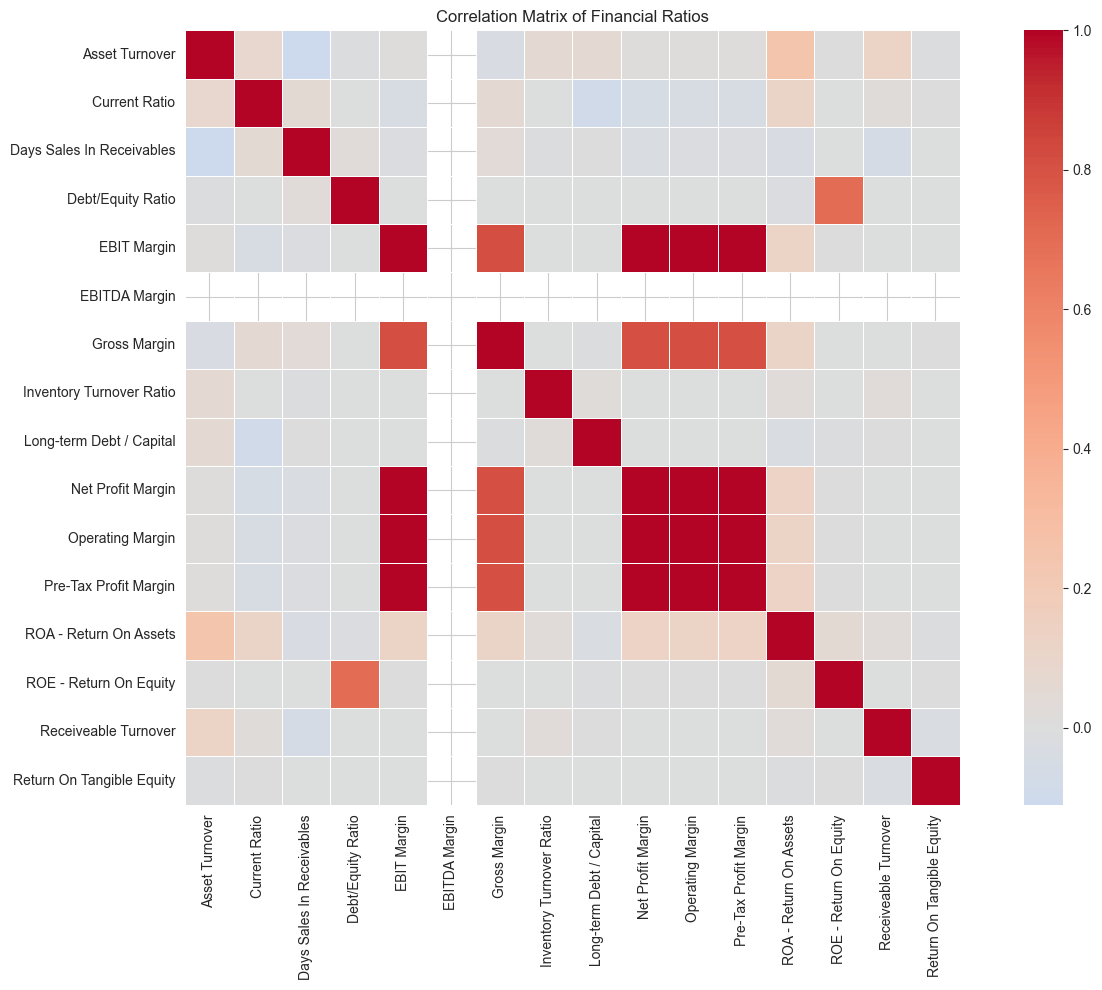

In [19]:
# Correlation heatmap of financial ratios
plt.figure(figsize=(14, 10))
correlation = df[ratio_columns].corr()
sns.heatmap(correlation, annot=False, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Correlation Matrix of Financial Ratios')
plt.tight_layout()
plt.show()

## 7. Data Quality Summary Report

In [20]:
# Generate comprehensive data quality report
print("=" * 80)
print("DATA QUALITY SUMMARY REPORT")
print("=" * 80)
print(f"\nReport Generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print("\n1. DATASET OVERVIEW")
print(f"   - Total Records: {len(df):,}")
print(f"   - Total Columns: {len(df.columns)}")
print(f"   - Unique Tickers: {df['Ticker'].nunique()}")
print(f"   - Date Range: {df['Date'].min().date()} to {df['Date'].max().date()}")
print(f"   - Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\n2. DATA COMPLETENESS")
total_cells = df.shape[0] * df.shape[1]
missing_cells = df.isnull().sum().sum()
completeness = ((total_cells - missing_cells) / total_cells) * 100
print(f"   - Overall Completeness: {completeness:.2f}%")
print(f"   - Missing Cells: {missing_cells:,} out of {total_cells:,}")
print(f"   - Columns with Missing Data: {(df.isnull().sum() > 0).sum()} out of {len(df.columns)}")

print("\n3. VaR-CRITICAL COLUMNS QUALITY")
for col in var_columns:
    missing = df[col].isnull().sum()
    status = "✓ PASS" if missing == 0 else "✗ FAIL"
    print(f"   - {col}: {status} ({missing} missing values)")

print("\n4. DATA INTEGRITY")
print(f"   - Duplicate Records: {df.duplicated(subset=['Ticker', 'Date']).sum()}")
print(f"   - Negative Close Prices: {(df['Close'] < 0).sum()}")
print(f"   - Zero Close Prices: {(df['Close'] == 0).sum()}")
print(f"   - Negative Volumes: {(df['Volume'] < 0).sum()}")

print("\n5. RECOMMENDATIONS")
if duplicates > 0:
    print("   ⚠️ Remove or investigate duplicate (Ticker, Date) combinations")
if (df['Close'] <= 0).sum() > 0:
    print("   ⚠️ Handle negative or zero close prices before VaR calculation")
if missing_cells > 0:
    print("   ⚠️ Address missing values in financial ratios if needed for analysis")
print("   ✓ Ensure at least 250 trading days of data per ticker for Basel III compliance")
print("   ✓ Consider data validation rules for outlier detection")
print("   ✓ Verify ticker symbols match current S&P 500 constituents")

print("\n" + "=" * 80)

DATA QUALITY SUMMARY REPORT

Report Generated: 2025-12-12 21:54:44

1. DATASET OVERVIEW
   - Total Records: 1,048,575
   - Total Columns: 23
   - Unique Tickers: 321
   - Date Range: 2005-04-01 to 2020-09-30
   - Memory Usage: 236.12 MB

2. DATA COMPLETENESS
   - Overall Completeness: 99.35%
   - Missing Cells: 156,876 out of 24,117,225
   - Columns with Missing Data: 3 out of 23

3. VaR-CRITICAL COLUMNS QUALITY
   - Ticker: ✓ PASS (0 missing values)
   - Date: ✓ PASS (0 missing values)
   - Close: ✓ PASS (0 missing values)
   - Volume: ✓ PASS (0 missing values)

4. DATA INTEGRITY
   - Duplicate Records: 0
   - Negative Close Prices: 0
   - Zero Close Prices: 0
   - Negative Volumes: 0

5. RECOMMENDATIONS
   ⚠️ Address missing values in financial ratios if needed for analysis
   ✓ Ensure at least 250 trading days of data per ticker for Basel III compliance
   ✓ Consider data validation rules for outlier detection
   ✓ Verify ticker symbols match current S&P 500 constituents



## 8. Basel III VaR Calculation Preview

This section demonstrates the basic structure for VaR calculation.

In [21]:
# Filter data for tickers with sufficient history (250+ days)
ticker_obs = df.groupby('Ticker')['Date'].count()
valid_tickers = ticker_obs[ticker_obs >= 250].index.tolist()

print(f"Tickers with >= 250 observations: {len(valid_tickers)} out of {df['Ticker'].nunique()}")
print(f"\nSample tickers: {valid_tickers[:10]}")

Tickers with >= 250 observations: 320 out of 321

Sample tickers: ['A', 'AAL', 'AAP', 'AAPL', 'ABBV', 'ABC', 'ABMD', 'ABT', 'ACN', 'ADBE']


Sample Returns Data:
                  GS       ACN       ADI      ADSK      AMAT       COO  \
Date                                                                     
2005-04-01       NaN       NaN       NaN       NaN       NaN       NaN   
2005-04-04  0.015492 -0.003311 -0.002912  0.039400  0.002480 -0.005171   
2005-04-05 -0.003767  0.020247 -0.008368 -0.013824 -0.002480  0.007399   
2005-04-06  0.017170  0.004864  0.002937  0.037489 -0.000828  0.022417   
2005-04-07  0.009125 -0.003240  0.019088  0.034930  0.009072  0.006642   

                COST       CPB      CPRT       CRM  
Date                                                
2005-04-01       NaN       NaN       NaN       NaN  
2005-04-04  0.030917  0.005018  0.006873 -0.002670  
2005-04-05  0.026063  0.001112  0.011915  0.021165  
2005-04-06 -0.001818  0.002774  0.008425  0.000000  
2005-04-07  0.013552  0.001107  0.000000  0.010417  


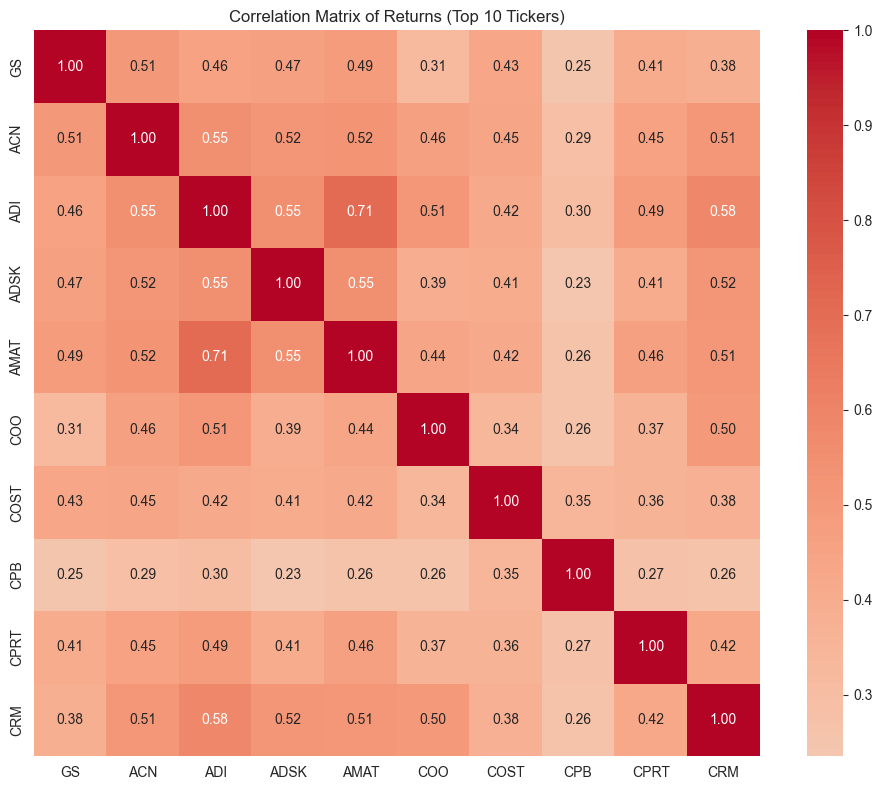

In [22]:
# Calculate returns for top 10 tickers by data availability
top_tickers = ticker_obs.nlargest(10).index.tolist()

returns_data = []
for ticker in top_tickers:
    ticker_df = df[df['Ticker'] == ticker].sort_values('Date').copy()
    ticker_df['Log_Return'] = np.log(ticker_df['Close'] / ticker_df['Close'].shift(1))
    returns_data.append(ticker_df[['Date', 'Log_Return']].rename(columns={'Log_Return': ticker}))

# Merge all returns into one dataframe
if returns_data:
    returns_df = returns_data[0]
    for df_temp in returns_data[1:]:
        returns_df = returns_df.merge(df_temp, on='Date', how='outer')
    
    returns_df = returns_df.set_index('Date').sort_index()
    
    print("Sample Returns Data:")
    print(returns_df.head())
    
    # Calculate correlation
    plt.figure(figsize=(10, 8))
    sns.heatmap(returns_df.corr(), annot=True, cmap='coolwarm', center=0, 
                square=True, fmt='.2f')
    plt.title('Correlation Matrix of Returns (Top 10 Tickers)')
    plt.tight_layout()
    plt.show()

## Summary

### For Basel III VaR Calculation, you need:
1. **Ticker** - Security identifier
2. **Date** - Time dimension
3. **Close** - For calculating returns
4. **Volume** - For liquidity assessment (optional but recommended)

### Financial ratios are NOT required for VaR but useful for:
- Credit risk analysis
- Fundamental screening
- Risk-adjusted performance evaluation
- Portfolio construction constraints